In [1]:
import sys

sys.path.insert(0, "../simulation")
sys.path.insert(0, "../methods")

import numpy as np
from ReconstructionErrorClass import RE
from AnalyticalMappingEntropyClass import AME
from SimulationClass import Simulation
from TicaTimescalesClass import TICA
#from _methods_utils import _mapping_combinations
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

%matplotlib inline

In [2]:
traj = np.load('./model_protein_coords.npy')
print(traj.shape)

(9900, 13, 3)


In [3]:
RE_model = RE(traj=traj, device='cuda')

In [4]:
RE_model.train_RE(batch_size=128,
                  lr_non_linear=3e-4,
                  max_epoch=301,
                  epoch_nonlinear=150,
                  loss_print=False) # it will take a while

(array([ 3.,  7., 12.,  5.,  8., 10.,  6.,  5.,  4.,  5.,  3.,  4.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.23099201, 0.24252581, 0.25405961, 0.26559341, 0.27712721,
        0.28866101, 0.30019481, 0.31172861, 0.32326241, 0.33479621,
        0.34633001, 0.35786381, 0.36939761, 0.3809314 , 0.3924652 ,
        0.403999  , 0.4155328 , 0.4270666 , 0.4386004 , 0.4501342 ,
        0.461668  ]),
 <BarContainer object of 20 artists>)

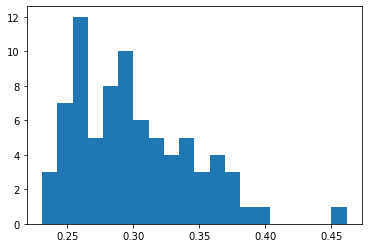

In [5]:
loss_tests = []
for key in RE_model.loss_tests.keys():
    loss_tests.append(np.mean(RE_model.loss_tests[key][-5::]))
    
plt.hist(loss_tests, bins=20)